In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import regex as re

In [2]:
## reading the final financial file for performing senitement analysis
df=pd.read_csv('C:\\Users\\laksh\Desktop\\Capstone Project - Laksh\\stock.csv')

In [3]:
df

,Unnamed: 0,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,day,month,year
0,1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 13574226280...",whats your number one over-valued stock? \n\nm...,0,1,0,0,en,Twitter Web App,"['TSLA', 'nvda']",30,April,2022
1,7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, ...",@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 ...,1,0,1,0,en,Twitter for Android,"['Egolon', 'TSLA']",30,April,2022
2,9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708...",https://t.co/H7UDtdLkQj \nMake Your Cash Work ...,0,0,1,1,en,AdvisorStream v2,"['Wealth', 'Money', 'Stocks', 'Investing', 'In...",30,April,2022
3,10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105...",$TSLA PREDICTION-🟥\n\nTomorrows Predicted Pric...,0,2,3,0,en,StockTRXK,"['TSLA', 'stockalert', 'Nasdaq', 'Stocks']",30,April,2022
4,14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654...",Note #TWTR only made $52MM (after accounting f...,0,0,7,0,en,Twitter for Android,"['TWTR', 'TSLA']",30,April,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,157456,2021-05-01 11:59:16+00:00,"{'username': 'normanwlucas', 'id': 115983695, ...",Is it Friday yet? Friday this week is Nat'l Tu...,0,0,0,0,en,IFTTT,['fb'],1,May,2021
26273,157475,2021-05-01 11:11:58+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE..!\n\nInspiration...\n\n...,1,11,16,0,en,Twitter for iPad,"['drMM', 'fb']",1,May,2021
26274,157476,2021-05-01 11:11:17+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE\n\nInspiration...\n\n ...,1,9,19,0,en,Twitter for iPad,"['drMM', 'fb']",1,May,2021
26275,157493,2021-05-01 10:19:22+00:00,"{'username': 'TimothyMbaya', 'id': 269758317, ...","""RESTAURANTS AND eateries to reopen with stric...",0,0,0,0,en,IFTTT,['fb'],1,May,2021


## Data Cleaning

In [4]:
## example of removing hyperlinks, hashtags ,mentioned users and retweets
tweet='RT@abc https://t.co/h7udtdlkqj make your cash work harder as interest rates rise. #wealth #money #stocks #investing #investorsnews #amc #gme #amzn #twtr #tsla #ater #bbig #cei https://t.co/g9ztyrzitb https://t.co/p6fwafsij1'
tweet
tweet=re.sub(r'http[^\s]+', '', tweet)
tweet=re.sub(r'#[^\s]+', '', tweet)
tweet=re.sub(r'RT@[^\s]+', '', tweet)
tweet=re.sub(r'@[^\s]+', '', tweet)

tweet

'  make your cash work harder as interest rates rise.               '

In [5]:
#!pip install contractions

In [6]:
import contractions

In [7]:
print('...Before Contraction...')
df.content[33]

...Before Contraction...


"Agreed sold #TSLA stocks when #Musk started talking stupid shit. Better companies and stocks out there were the CEO isn't a total douche flute. And think his cars are ugly, lot more electric vehicles are being produced. https://t.co/extBLAxnoN"

In [8]:
for i in range(0,len(df)):
    text = str(df.content.loc[i])
    expanded_words = []   
    for word in text.split():
  # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  
      #print(expanded_words)
    expanded_text = ' '.join(expanded_words)
    #print(expanded_text)
    df.content.loc[i]=expanded_text

In [9]:
print('...After Contraction...')
df.content[33]

...After Contraction...


'Agreed sold #TSLA stocks when #Musk started talking stupid shit. Better companies and stocks out there were the CEO is not a total douche flute. And think his cars are ugly, lot more electric vehicles are being produced. https://t.co/extBLAxnoN'

In [10]:
print('...Before Removing HyperLink..')
df['content'][2]


...Before Removing HyperLink..


'https://t.co/H7UDtdLkQj Make Your Cash Work Harder as Interest Rates Rise. #Wealth #Money #Stocks #Investing #InvestorsNews #AMC #GME #AMZN #TWTR #TSLA #ATER #BBIG #CEI https://t.co/g9ztYRzitb https://t.co/p6FWafSIJ1'

In [11]:
## removal of hyperlinks
df['cleaned']=df['content'].replace(to_replace=r'http[^\s]+',value='',regex=True)

print('...After Removing HyperLink..')
df['cleaned'][2]

...After Removing HyperLink..


' Make Your Cash Work Harder as Interest Rates Rise. #Wealth #Money #Stocks #Investing #InvestorsNews #AMC #GME #AMZN #TWTR #TSLA #ATER #BBIG #CEI  '

In [12]:
print('...Before Removing Hashtags..')
df['content'][2]

...Before Removing Hashtags..


'https://t.co/H7UDtdLkQj Make Your Cash Work Harder as Interest Rates Rise. #Wealth #Money #Stocks #Investing #InvestorsNews #AMC #GME #AMZN #TWTR #TSLA #ATER #BBIG #CEI https://t.co/g9ztYRzitb https://t.co/p6FWafSIJ1'

In [13]:
## removal of hashtags
df['cleaned']=df['cleaned'].replace(to_replace=r'#[^\s]+',value='',regex=True)

print('...After Removing Hashtag..')
df['cleaned'][2]

...After Removing Hashtag..


' Make Your Cash Work Harder as Interest Rates Rise.               '

In [14]:
print('...Before Removing Retweets and mentions..')
df['content'][6]

...Before Removing Retweets and mentions..


'@richsignorelli But will not that allow #TSLA fanboys to buy stock cheaper &amp; Christian Conservative Republicans to buy all the the @Tesla inventory, even though @elonmusk used its equity to buy @Twitter at a ~$150B loss? I mean, everyone knows Republicans buy EVs, right? https://t.co/bdPUIEZMJo'

In [15]:
## removal of Retweets and mentions
df['cleaned']=df['cleaned'].replace(to_replace=r'RT@[^\s]+',value='',regex=True)
df['cleaned']=df['cleaned'].replace(to_replace=r'@[^\s]+',value='',regex=True)


print('...After Removing Retweets and mentions..')
df['cleaned'][6]

...After Removing Retweets and mentions..


' But will not that allow  fanboys to buy stock cheaper &amp; Christian Conservative Republicans to buy all the the  inventory, even though  used its equity to buy  at a ~$150B loss? I mean, everyone knows Republicans buy EVs, right? '

In [16]:
print('...Before Removing Newline..')
df['cleaned'][10]

...Before Removing Newline..


' It is what people see/perceive. Not in the business of letting other people’s thoughts run my life. One can empathize Or distract the conversation Oh look  tanked  stock 🙏🏼🖖🏼🥸'

In [17]:
## removal of newline
df['cleaned']=df['cleaned'].replace(to_replace='\n',value=' ',regex=True)


print('...After Removing Newline..')
df['cleaned'][10]

...After Removing Newline..


' It is what people see/perceive. Not in the business of letting other people’s thoughts run my life. One can empathize Or distract the conversation Oh look  tanked  stock 🙏🏼🖖🏼🥸'

In [18]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [19]:
print('...Before Removing Emoticons..')
df['cleaned'][10]

...Before Removing Emoticons..


' It is what people see/perceive. Not in the business of letting other people’s thoughts run my life. One can empathize Or distract the conversation Oh look  tanked  stock 🙏🏼🖖🏼🥸'

In [20]:
## Removal of Emoticons
df['cleaned'] = df['cleaned'].apply(lambda x: remove_emoji(x))
df['cleaned'][10]

' It is what people see/perceive. Not in the business of letting other people’s thoughts run my life. One can empathize Or distract the conversation Oh look  tanked  stock 🥸'

In [21]:
print('...Before Removing Puntuation..')
df['cleaned'][6]

...Before Removing Puntuation..


' But will not that allow  fanboys to buy stock cheaper &amp; Christian Conservative Republicans to buy all the the  inventory, even though  used its equity to buy  at a ~$150B loss? I mean, everyone knows Republicans buy EVs, right? '

In [22]:
## removal of puntuation
df['cleaned']=df['cleaned'].replace(to_replace=r'[^\w\s]',value='',regex=True)
df['cleaned']=df['cleaned'].replace(to_replace=r'[^a-zA-Z\s]+',value='',regex=True)
print('...After Removing Puntutation..')
df['cleaned'][6]


...After Removing Puntutation..


' But will not that allow  fanboys to buy stock cheaper amp Christian Conservative Republicans to buy all the the  inventory even though  used its equity to buy  at a B loss I mean everyone knows Republicans buy EVs right '

In [23]:
print('...Before Removing Digits..')
df['cleaned'][6]

...Before Removing Digits..


' But will not that allow  fanboys to buy stock cheaper amp Christian Conservative Republicans to buy all the the  inventory even though  used its equity to buy  at a B loss I mean everyone knows Republicans buy EVs right '

In [24]:
## removal of digits
df['cleaned']=df['cleaned'].replace(to_replace=r'\d+',value='',regex=True)

print('...After Removing Digits..')
df['cleaned'][6]


...After Removing Digits..


' But will not that allow  fanboys to buy stock cheaper amp Christian Conservative Republicans to buy all the the  inventory even though  used its equity to buy  at a B loss I mean everyone knows Republicans buy EVs right '

In [25]:
print('...Before Removing Spaces..')
df['cleaned'][0]

...Before Removing Spaces..


'what is your number one overvalued stock mine is  and '

In [26]:
## removal of spaces
df['cleaned']=df['cleaned'].replace(to_replace='  ',value=' ',regex=True)

print('...After Removing Spaces..')
df['cleaned'][0]

...After Removing Spaces..


'what is your number one overvalued stock mine is and '

In [27]:
## removing front spaces
df['cleaned']=df['cleaned'].str.lstrip(' ')

In [28]:
print('...Before Lower Case..')
df['cleaned'][4]

...Before Lower Case..


'Note only made MM after accounting for stock awardsall paper no cash in TTM So with Mil there is no way the Company can service Bil in debt Elon will put on TWTR balance sheet So THEM most likely will be forced to sell more of his stock to service debt '

In [29]:
## making the words in lower case
df['cleaned']=df['cleaned'].str.lower()

print('...After Lower Case..')
df['cleaned'][4]


...After Lower Case..


'note only made mm after accounting for stock awardsall paper no cash in ttm so with mil there is no way the company can service bil in debt elon will put on twtr balance sheet so them most likely will be forced to sell more of his stock to service debt '

In [30]:
df

,Unnamed: 0,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,day,month,year,cleaned
0,1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 13574226280...",what is your number one over-valued stock? min...,0,1,0,0,en,Twitter Web App,"['TSLA', 'nvda']",30,April,2022,what is your number one overvalued stock mine ...
1,7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, ...",@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 ...,1,0,1,0,en,Twitter for Android,"['Egolon', 'TSLA']",30,April,2022,nice peter if only all of twitter were so norm...
2,9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708...",https://t.co/H7UDtdLkQj Make Your Cash Work Ha...,0,0,1,1,en,AdvisorStream v2,"['Wealth', 'Money', 'Stocks', 'Investing', 'In...",30,April,2022,make your cash work harder as interest rates r...
3,10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105...",$TSLA PREDICTION-🟥 Tomorrows Predicted Price :...,0,2,3,0,en,StockTRXK,"['TSLA', 'stockalert', 'Nasdaq', 'Stocks']",30,April,2022,tsla prediction tomorrows predicted price cu...
4,14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654...",Note #TWTR only made $52MM (after accounting f...,0,0,7,0,en,Twitter for Android,"['TWTR', 'TSLA']",30,April,2022,note only made mm after accounting for stock a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,157456,2021-05-01 11:59:16+00:00,"{'username': 'normanwlucas', 'id': 115983695, ...",Is it Friday yet? Friday this week is Nat'l Tu...,0,0,0,0,en,IFTTT,['fb'],1,May,2021,is it friday yet friday this week is natl tuba...
26273,157475,2021-05-01 11:11:58+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE..! Inspiration... Ideas....,1,11,16,0,en,Twitter for iPad,"['drMM', 'fb']",1,May,2021,keys to your palace inspiration ideas instruct...
26274,157476,2021-05-01 11:11:17+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE Inspiration... Ideas... ...,1,9,19,0,en,Twitter for iPad,"['drMM', 'fb']",1,May,2021,keys to your palace inspiration ideas instruct...
26275,157493,2021-05-01 10:19:22+00:00,"{'username': 'TimothyMbaya', 'id': 269758317, ...","""RESTAURANTS AND eateries to reopen with stric...",0,0,0,0,en,IFTTT,['fb'],1,May,2021,restaurants and eateries to reopen with strict...


## Tokenization ## Lemmatization ## StopWord Removal

In [31]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [32]:
text = "Pyton is a great programming language and it has many features. It has many packages and algorithms for data anlaytics"

In [33]:
word_tokenize(text)

['Pyton',
 'is',
 'a',
 'great',
 'programming',
 'language',
 'and',
 'it',
 'has',
 'many',
 'features',
 '.',
 'It',
 'has',
 'many',
 'packages',
 'and',
 'algorithms',
 'for',
 'data',
 'anlaytics']

In [34]:
def token(text):
    words=word_tokenize(text)
    return words

In [35]:
df['token'] = df['cleaned'].apply(lambda x: token(x))

In [36]:
## stop words in nltk
import nltk
all_stopwords_nltk=stopwords.words('english')
print(all_stopwords_nltk)
len(all_stopwords_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [37]:
stopwords_generic= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
                   'aa','bb','cc','dd','ee','ff','gg','hh','ii','jj','kk','ll','mm','nn','oo','pp','qq','rr','rt','ss','tt','uu','vv','ww','xx',
                   'yy','zz','amp','put','via','let','to','by','the', "'re", 
                   'somehow', 'another', 'four', 'please', 'show', 'never', 'therefore', 'toward', 'yours', 
                   'what', 'in', 'but', 'ourselves', 'anyone', 'be', 'had', 'whenever', 'enough', 'not', 'sixty', 
                   "'m", 'above', 'again', 'only', 'among', 'every', 'sometime', 'hereby', 'down', 'any', 'used', 
                   'hundred', 'did', 'really', "'ll", 'made', "'s", 'do', 'same', 'him', 'thus', 'has', 'at', '’re', 
                   'forty', 'also', 'ca', 'been', 'along', 'when', 'rather', 'seeming', 'about', 'meanwhile', 'may', 
                   'below', 'get', 'too', 'one', 'other', 'would', 'nor', 'no', 'either', 'name', 'perhaps', 'always', 
                   'quite', 'namely', 'both', 'call', 'though', 'amongst', 'is', 'ten', 'move', 'everywhere', 'against', 'a', 
                   'thru', 'each', 'myself', 'besides', 'as', 'yourself', 'whether', 'else', 'still', 'herself', 'almost',
                   'mostly', 'then', 'on', 'such', 'you', 'towards', '‘s', 'very', 'across', 'us', 'whence', 'therein', 
                   'being', 'ever', 'behind', 'your', 'whereby', 'beside', 'noone', 'much', 'within', 'anywhere', 'per', 
                   'see', 'could', 'yet', 'its', 'all', 'here', 'part', 'nobody', '’d', 'if', 'these', 'thence', 'give', 
                   'it', 'them', 'empty', 'over', 'twelve', 'nowhere', 'make', 'hereupon', 'now', 'last', 'fifteen', 
                   'however', 'around', 'someone', 'yourselves', 'before', 'up', 'am', 'that', 'side', 'serious', 'his',
                   'than', 'often', 'while', 'under', 'my', 'was', 'our', 'by', 'seemed', 'put', 'eleven', 'those', '‘d',
                   'whose', 'fifty', 'front', 'me', 'keep', 'third', 'two', 'further', 'itself', 'many', 'whither', 
                   'moreover', 'full', 'themselves', 'throughout', 'were', 'have', 'of', 'hers', 'back', 'eight', 'others', 
                   'which', 'should', 'well', 'twenty', 'this', 'anyhow', 'latterly', 'we', 'few', 'during', 'whereafter', 
                   'might', 'whoever', 'because', 'except', 'regarding', 'seems', 'upon', 'why', "n't", 'six', 'off', '‘m', 
                   'ours', 'nine', 'beforehand', 'out', "'d", 'beyond', 'just', 'from', 'where', 'next', 'former', 'becomes', 
                   'hence', '‘ll', 'hereafter', 'becoming', 'sometimes', 'until', 'who', 'nevertheless', 'she', 'alone', 'how',
                   'even', 'whereas', 'afterwards', 'must', 'least', 'top', 'less', 'whatever', 'neither', '’ll', 'together',
                   'most', 'first', 'become', 'i', 'or', 'can', 'using', 'n’t', 'somewhere', 'does', 'unless', 'wherever', 'due'
                   , 'some', 'five', 'thereafter', 'are', 'once', 'mine', 'her', 'and', 'between', 'amount', 'already', 'done',
                   '’m', 'own', 'doing', 'everyone', '’ve', 'their', 'nothing', 'an', 'formerly', 'to', 'wherein', 'became', 
                   'whereupon', 'cannot', 'anything', 'whole', 'so', 'after', '‘re', 'although', 'several', 'since', 'himself',
                   're', 'three', 'n‘t', 'take', 'none', 'with', 'onto', 'there', 'they', 'thereupon', 'will', 'otherwise',
                   'various', 'he', 'go', 'via', 'indeed', 'something', '‘ve', 'seem', 'herein', 'for', "'ve", 'more',
                   'everything', 'thereby', 'say', 'through', '’s', 'elsewhere', 'whom', 'without', 'into', 'bottom', 
                   'anyway', 'latter','svp','gt','nd','iwm','doc','ocee','pas','tslas','naw','apr','ah','fag','st','spx','dow','ev','bil','aaa', 'aal', 'aap', 'aapla']



In [38]:
#for values in stopwords_generic:
 #   if values not in all_stopwords_nltk:
       # print(values)
  #  else:
   #     pass

In [39]:
for values in stopwords_generic:
    if values not in all_stopwords_nltk:
        all_stopwords_nltk.append(values)
        
    else:
        pass
print(all_stopwords_nltk)  


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
def remove_stopwords(text):
    words=word_tokenize(text)
    tokens_without_sw= [word for word in words if not word in all_stopwords_nltk]
    return tokens_without_sw

In [41]:
## removal of stop words
df['token_final'] = df['cleaned'].apply(lambda x: remove_stopwords(x))

In [42]:
print('....Tokens before removal of stop words...')
df['token'][3]

....Tokens before removal of stop words...


['tsla',
 'prediction',
 'tomorrows',
 'predicted',
 'price',
 'current',
 'price',
 'tsla',
 'predicted',
 'to',
 'decrease',
 'by']

In [43]:
print('....Tokens after removal of stop words...')
df['token_final'][3]

....Tokens after removal of stop words...


['tsla',
 'prediction',
 'tomorrows',
 'predicted',
 'price',
 'current',
 'price',
 'tsla',
 'predicted',
 'decrease']

In [44]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
## Lemmatization Example
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
lemmatizer.lemmatize("studies")

'study'

In [47]:
word = ['eat','agililty','work','ability']

for i in word:

    print(i,'|',lemmatizer.lemmatize(i))



eat | eat
agililty | agililty
work | work
ability | ability


In [48]:
## stemming example
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [49]:
for i in word:
    print(i, "|", stemmer.stem(i))

eat | eat
agililty | agililti
work | work
ability | abil


In [50]:

#def lemma(text):
 #   new=[]
  #  words=word_tokenize(text)
   # tokens_without_sw= [word for word in words if not word in all_stopwords_nltk]
    

    #for values in tokens_without_sw:
     #   new.append(lemmatizer.lemmatize(values))
    #return new

In [51]:
## Applying lemmatization on the tweets
def lemma(text):
    new=[]
    val=[]
    words=word_tokenize(text)
    tokens_without_sw= [word for word in words if not word in all_stopwords_nltk]
    
    
    replace= {'tsla':'tesla','amzn':'amazon','aapl':'apple','fb':'facebook','msft':'microsoft','twtr':'twitter','krap':'crap'}
    
    for values in tokens_without_sw:
        if values =='tsla' or values =='amzn' or values =='msft' or values =='fb' or values =='aapl':
            val.append(values.replace(values,replace[values]))
        else:
            val.append(values)
            
    for values in val:
        new.append(lemmatizer.lemmatize(values))
            
    return new
            
        

In [52]:
text='tsla has a new share that make amzn management studies tsla msft microsoft apple aapl fb facebook ability amp'
lemma(text)

['tesla',
 'new',
 'share',
 'amazon',
 'management',
 'study',
 'tesla',
 'microsoft',
 'microsoft',
 'apple',
 'apple',
 'facebook',
 'facebook',
 'ability']

In [53]:
print('....Before Lemmatization....')
df['token_final'][1:10]

....Before Lemmatization....


1    [nice, peter, twitter, normal, deals, target, ...
2          [cash, work, harder, interest, rates, rise]
3    [tsla, prediction, tomorrows, predicted, price...
4    [note, accounting, stock, awardsall, paper, ca...
5    [following, acquisition, twitter, billion, elo...
6    [allow, fanboys, buy, stock, cheaper, christia...
7         [tsla, seeing, uptick, chatter, chan, hours]
8    [recently, found, twtr, live, breathe, stuff, ...
9    [believe, mind, potential, buyers, alert, soci...
Name: token_final, dtype: object

In [54]:
## applying lemmatization
df['token_final'] = df['cleaned'].apply(lambda x: lemma(x))

In [55]:
print('....After Lemmatization....')
df['token_final'][1:10]

....After Lemmatization....


1    [nice, peter, twitter, normal, deal, target, e...
2           [cash, work, harder, interest, rate, rise]
3    [tesla, prediction, tomorrow, predicted, price...
4    [note, accounting, stock, awardsall, paper, ca...
5    [following, acquisition, twitter, billion, elo...
6    [allow, fanboys, buy, stock, cheaper, christia...
7         [tesla, seeing, uptick, chatter, chan, hour]
8    [recently, found, twtr, live, breathe, stuff, ...
9    [believe, mind, potential, buyer, alert, socia...
Name: token_final, dtype: object

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [57]:
analyzer = SentimentIntensityAnalyzer()
df['Positive Score'] = df['content'].apply(lambda tweet: analyzer.polarity_scores(tweet)['pos'])
df['Neutral Score'] = df['content'].apply(lambda tweet: analyzer.polarity_scores(tweet)['neu'])
df['Negative Score'] = df['content'].apply(lambda tweet: analyzer.polarity_scores(tweet)['neg'])



In [58]:
df['Polarity'] = df['content'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

In [59]:
df

,Unnamed: 0,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,...,day,month,year,cleaned,token,token_final,Positive Score,Neutral Score,Negative Score,Polarity
0,1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 13574226280...",what is your number one over-valued stock? min...,0,1,0,0,en,Twitter Web App,...,30,April,2022,what is your number one overvalued stock mine ...,"[what, is, your, number, one, overvalued, stoc...","[number, overvalued, stock]",0.106,0.894,0.000,0.0772
1,7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, ...",@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 ...,1,0,1,0,en,Twitter for Android,...,30,April,2022,nice peter if only all of twitter were so norm...,"[nice, peter, if, only, all, of, twitter, were...","[nice, peter, twitter, normal, deal, target, e...",0.104,0.825,0.070,0.1680
2,9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708...",https://t.co/H7UDtdLkQj Make Your Cash Work Ha...,0,0,1,1,en,AdvisorStream v2,...,30,April,2022,make your cash work harder as interest rates r...,"[make, your, cash, work, harder, as, interest,...","[cash, work, harder, interest, rate, rise]",0.111,0.889,0.000,0.4588
3,10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105...",$TSLA PREDICTION-🟥 Tomorrows Predicted Price :...,0,2,3,0,en,StockTRXK,...,30,April,2022,tsla prediction tomorrows predicted price cu...,"[tsla, prediction, tomorrows, predicted, price...","[tesla, prediction, tomorrow, predicted, price...",0.000,1.000,0.000,0.0000
4,14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654...",Note #TWTR only made $52MM (after accounting f...,0,0,7,0,en,Twitter for Android,...,30,April,2022,note only made mm after accounting for stock a...,"[note, only, made, mm, after, accounting, for,...","[note, accounting, stock, awardsall, paper, ca...",0.000,0.798,0.202,-0.8860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,157456,2021-05-01 11:59:16+00:00,"{'username': 'normanwlucas', 'id': 115983695, ...",Is it Friday yet? Friday this week is Nat'l Tu...,0,0,0,0,en,IFTTT,...,1,May,2021,is it friday yet friday this week is natl tuba...,"[is, it, friday, yet, friday, this, week, is, ...","[friday, friday, week, natl, tuba, day, celebr...",0.245,0.755,0.000,0.7312
26273,157475,2021-05-01 11:11:58+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE..! Inspiration... Ideas....,1,11,16,0,en,Twitter for iPad,...,1,May,2021,keys to your palace inspiration ideas instruct...,"[keys, to, your, palace, inspiration, ideas, i...","[key, palace, inspiration, idea, instruction, ...",0.000,1.000,0.000,0.0000
26274,157476,2021-05-01 11:11:17+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE Inspiration... Ideas... ...,1,9,19,0,en,Twitter for iPad,...,1,May,2021,keys to your palace inspiration ideas instruct...,"[keys, to, your, palace, inspiration, ideas, i...","[key, palace, inspiration, idea, instruction, ...",0.000,1.000,0.000,0.0000
26275,157493,2021-05-01 10:19:22+00:00,"{'username': 'TimothyMbaya', 'id': 269758317, ...","""RESTAURANTS AND eateries to reopen with stric...",0,0,0,0,en,IFTTT,...,1,May,2021,restaurants and eateries to reopen with strict...,"[restaurants, and, eateries, to, reopen, with,...","[restaurant, eatery, reopen, strict, adherence...",0.000,1.000,0.000,0.0000


In [60]:
tweet=df['token_final']
tweet

0                              [number, overvalued, stock]
1        [nice, peter, twitter, normal, deal, target, e...
2               [cash, work, harder, interest, rate, rise]
3        [tesla, prediction, tomorrow, predicted, price...
4        [note, accounting, stock, awardsall, paper, ca...
                               ...                        
26272    [friday, friday, week, natl, tuba, day, celebr...
26273    [key, palace, inspiration, idea, instruction, ...
26274    [key, palace, inspiration, idea, instruction, ...
26275    [restaurant, eatery, reopen, strict, adherence...
26276    [karma, g, karma, automotive, plan, expand, li...
Name: token_final, Length: 26277, dtype: object

In [61]:
for i in range(len(tweet)):
    tweet[i]= " ".join(tweet[i])

In [62]:
df['cleaned_tweet'] = tweet

In [63]:
df['cleaned_tweet']

0                                  number overvalued stock
1        nice peter twitter normal deal target earlyoct...
2                      cash work harder interest rate rise
3        tesla prediction tomorrow predicted price curr...
4        note accounting stock awardsall paper cash ttm...
                               ...                        
26272    friday friday week natl tuba day celebrate tub...
26273    key palace inspiration idea instruction invest...
26274    key palace inspiration idea instruction invest...
26275    restaurant eatery reopen strict adherence covi...
26276    karma g karma automotive plan expand lineup ne...
Name: cleaned_tweet, Length: 26277, dtype: object

In [64]:
!pip install wordcloud

In [65]:
print(df[df['Polarity'] > 0].shape)
print(df[df['Polarity'] == 0].shape)
print(df[df['Polarity'] < 0].shape)

(12767, 22)
(9294, 22)
(4216, 22)


In [66]:
df['cleaned_tweet']

0                                  number overvalued stock
1        nice peter twitter normal deal target earlyoct...
2                      cash work harder interest rate rise
3        tesla prediction tomorrow predicted price curr...
4        note accounting stock awardsall paper cash ttm...
                               ...                        
26272    friday friday week natl tuba day celebrate tub...
26273    key palace inspiration idea instruction invest...
26274    key palace inspiration idea instruction invest...
26275    restaurant eatery reopen strict adherence covi...
26276    karma g karma automotive plan expand lineup ne...
Name: cleaned_tweet, Length: 26277, dtype: object

In [67]:
df['Emotion']=''

In [68]:
for i in range(0,len(df['Polarity'])):
    if df['Polarity'].loc[i]>0:
        df['Emotion'].loc[i]='Positive'
    elif df['Polarity'].loc[i]== 0:
        df['Emotion'].loc[i]='Neutral'
    else:
        df['Emotion'].loc[i]='Negative'

    

In [69]:
df.head(10)

,Unnamed: 0,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,...,year,cleaned,token,token_final,Positive Score,Neutral Score,Negative Score,Polarity,cleaned_tweet,Emotion
0,1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 13574226280...",what is your number one over-valued stock? min...,0,1,0,0,en,Twitter Web App,...,2022,what is your number one overvalued stock mine ...,"[what, is, your, number, one, overvalued, stoc...",number overvalued stock,0.106,0.894,0.000,0.0772,number overvalued stock,Positive
1,7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, ...",@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 ...,1,0,1,0,en,Twitter for Android,...,2022,nice peter if only all of twitter were so norm...,"[nice, peter, if, only, all, of, twitter, were...",nice peter twitter normal deal target earlyoct...,0.104,0.825,0.070,0.1680,nice peter twitter normal deal target earlyoct...,Positive
2,9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708...",https://t.co/H7UDtdLkQj Make Your Cash Work Ha...,0,0,1,1,en,AdvisorStream v2,...,2022,make your cash work harder as interest rates r...,"[make, your, cash, work, harder, as, interest,...",cash work harder interest rate rise,0.111,0.889,0.000,0.4588,cash work harder interest rate rise,Positive
3,10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105...",$TSLA PREDICTION-🟥 Tomorrows Predicted Price :...,0,2,3,0,en,StockTRXK,...,2022,tsla prediction tomorrows predicted price cu...,"[tsla, prediction, tomorrows, predicted, price...",tesla prediction tomorrow predicted price curr...,0.000,1.000,0.000,0.0000,tesla prediction tomorrow predicted price curr...,Neutral
4,14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654...",Note #TWTR only made $52MM (after accounting f...,0,0,7,0,en,Twitter for Android,...,2022,note only made mm after accounting for stock a...,"[note, only, made, mm, after, accounting, for,...",note accounting stock awardsall paper cash ttm...,0.000,0.798,0.202,-0.8860,note accounting stock awardsall paper cash ttm...,Negative
5,16,2022-04-30 19:51:10+00:00,"{'username': 'sell_io', 'id': 1515000388298158...",Following his acquisition of Twitter for $44 b...,0,0,0,0,en,Hootsuite Inc.,...,2022,following his acquisition of twitter for billi...,"[following, his, acquisition, of, twitter, for...",following acquisition twitter billion elon mus...,0.130,0.825,0.045,0.4767,following acquisition twitter billion elon mus...,Positive
6,21,2022-04-30 18:57:01+00:00,"{'username': 'Matthew__Andrus', 'id': 14178736...",@richsignorelli But will not that allow #TSLA ...,0,0,0,0,en,Twitter Web App,...,2022,but will not that allow fanboys to buy stock c...,"[but, will, not, that, allow, fanboys, to, buy...",allow fanboys buy stock cheaper christian cons...,0.000,0.885,0.115,-0.6496,allow fanboys buy stock cheaper christian cons...,Negative
7,28,2022-04-30 18:12:18+00:00,"{'username': 'topstonks', 'id': 12149575980735...",$TSLA seeing an uptick in chatter on 4chan ove...,1,0,0,0,en,topstonks,...,2022,tsla seeing an uptick in chatter on chan over ...,"[tsla, seeing, an, uptick, in, chatter, on, ch...",tesla seeing uptick chatter chan hour,0.000,1.000,0.000,0.0000,tesla seeing uptick chatter chan hour,Neutral
8,34,2022-04-30 17:31:12+00:00,"{'username': 'inthecopa', 'id': 13368074036654...","@garyblack00 @elonmusk Recently found you, @ga...",0,0,0,0,en,Twitter for iPhone,...,2022,recently found you on twtr you live and breath...,"[recently, found, you, on, twtr, you, live, an...",recently found twtr live breathe stuff learnin...,0.177,0.823,0.000,0.5944,recently found twtr live breathe stuff learnin...,Positive
9,36,2022-04-30 17:03:29+00:00,"{'username': 'ftaxw', 'id': 770114428922716163...",.@elonmusk Do you believe that the mind of pot...,0,0,0,0,en,Twitter Web App,...,2022,do you believe that the mind of potential buye...,"[do, you, believe, that, the, mind, of, p

## Postive WordCloud

In [70]:
import matplotlib.pyplot as plt

In [71]:
import sys
print(sys.executable)


C:\Users\laksh\anaconda3\python.exe


In [72]:
from wordcloud import WordCloud

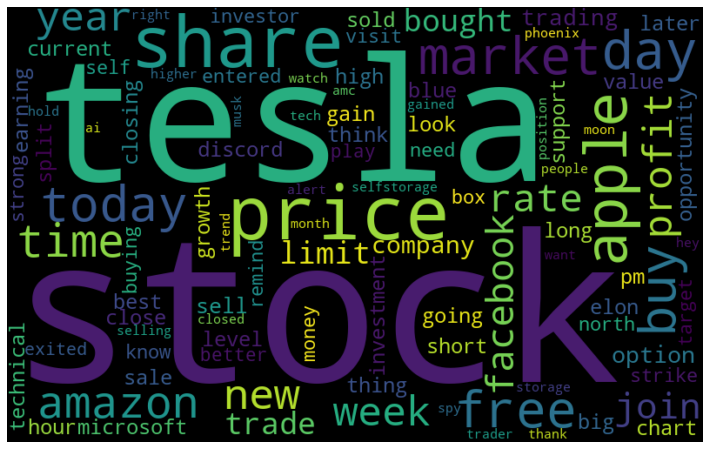

In [73]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href","good","great",'get','many','also','like','well','way','make','would','one','b']) 

data_wc = " ".join(review for review in df[df['Polarity']>0]['cleaned_tweet'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)

#print(data_wc)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negative WordCloud

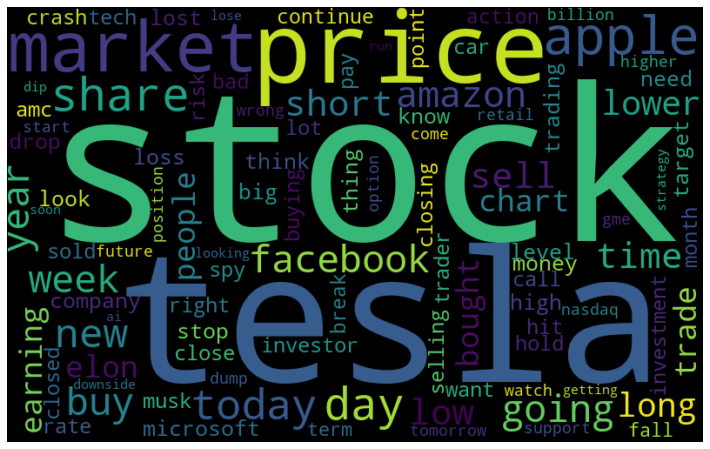

In [74]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href","good","great",'get','many','also','like','well','way','make','would','one','b']) 

data_wc = " ".join(review for review in df[df['Polarity']<0]['cleaned_tweet'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)

#print(data_wc)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Neutral WordCloud


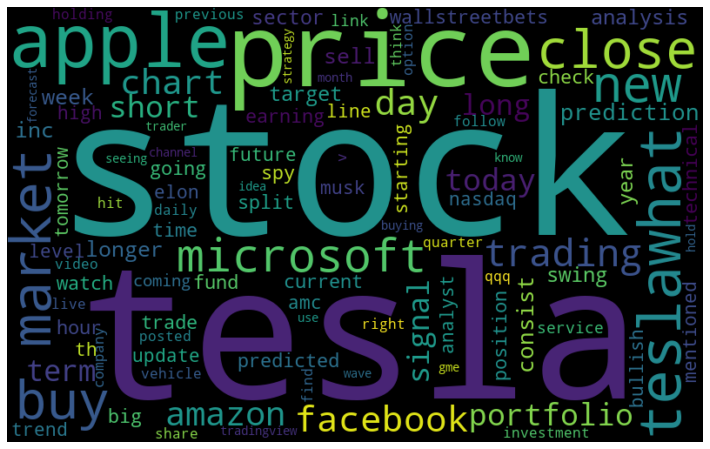

In [75]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

stopwords = set(stopwords)
stopwords.update(["br", "href","good","great",'get','many','also','like','well','way','make','would','one','b']) 

data_wc = " ".join(review for review in df[df['Polarity']==0]['cleaned_tweet'])
wordcloud = WordCloud(stopwords=stopwords,background_color='black',mode="RGB", width=800,height=500,
                      max_words=100,collocations=False).generate(data_wc)

#print(data_wc)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# TF-IDF

### TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.By vectorizing the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering, etc


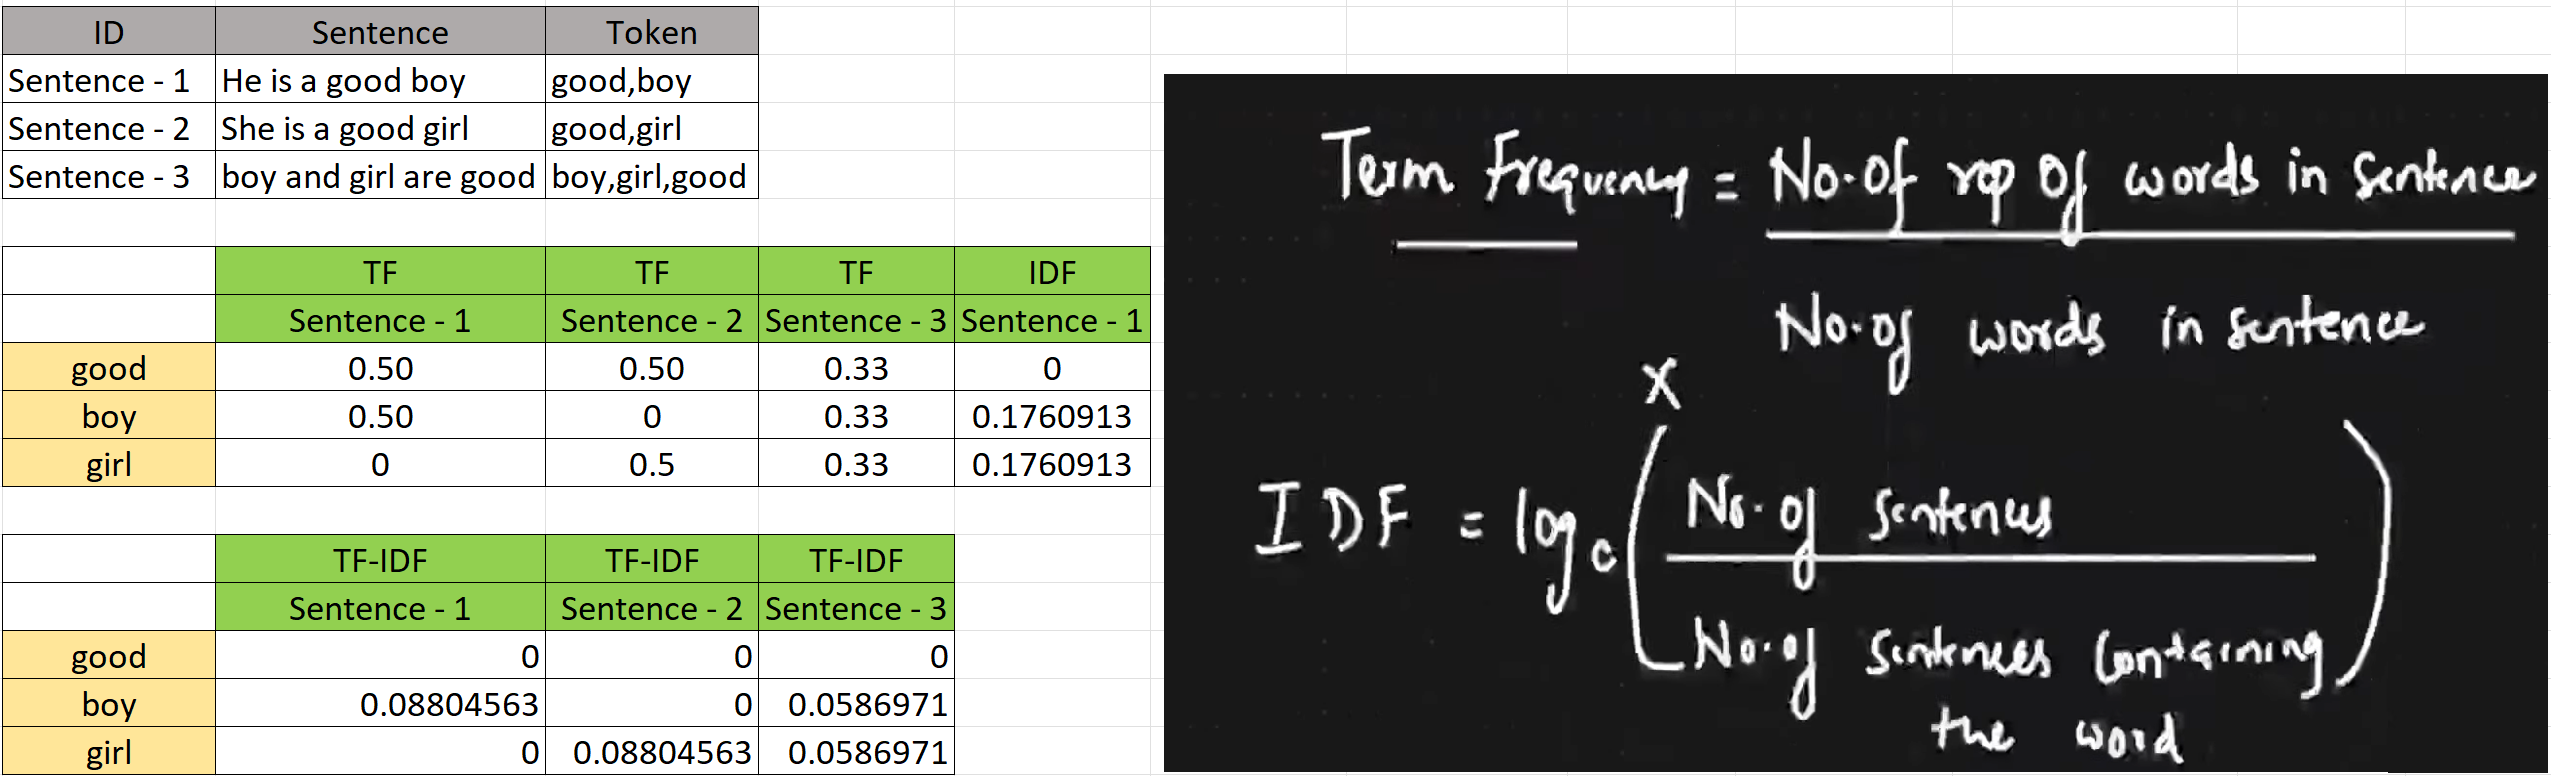


In [76]:
df

,Unnamed: 0,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,...,year,cleaned,token,token_final,Positive Score,Neutral Score,Negative Score,Polarity,cleaned_tweet,Emotion
0,1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 13574226280...",what is your number one over-valued stock? min...,0,1,0,0,en,Twitter Web App,...,2022,what is your number one overvalued stock mine ...,"[what, is, your, number, one, overvalued, stoc...",number overvalued stock,0.106,0.894,0.000,0.0772,number overvalued stock,Positive
1,7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, ...",@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 ...,1,0,1,0,en,Twitter for Android,...,2022,nice peter if only all of twitter were so norm...,"[nice, peter, if, only, all, of, twitter, were...",nice peter twitter normal deal target earlyoct...,0.104,0.825,0.070,0.1680,nice peter twitter normal deal target earlyoct...,Positive
2,9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708...",https://t.co/H7UDtdLkQj Make Your Cash Work Ha...,0,0,1,1,en,AdvisorStream v2,...,2022,make your cash work harder as interest rates r...,"[make, your, cash, work, harder, as, interest,...",cash work harder interest rate rise,0.111,0.889,0.000,0.4588,cash work harder interest rate rise,Positive
3,10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105...",$TSLA PREDICTION-🟥 Tomorrows Predicted Price :...,0,2,3,0,en,StockTRXK,...,2022,tsla prediction tomorrows predicted price cu...,"[tsla, prediction, tomorrows, predicted, price...",tesla prediction tomorrow predicted price curr...,0.000,1.000,0.000,0.0000,tesla prediction tomorrow predicted price curr...,Neutral
4,14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654...",Note #TWTR only made $52MM (after accounting f...,0,0,7,0,en,Twitter for Android,...,2022,note only made mm after accounting for stock a...,"[note, only, made, mm, after, accounting, for,...",note accounting stock awardsall paper cash ttm...,0.000,0.798,0.202,-0.8860,note accounting stock awardsall paper cash ttm...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,157456,2021-05-01 11:59:16+00:00,"{'username': 'normanwlucas', 'id': 115983695, ...",Is it Friday yet? Friday this week is Nat'l Tu...,0,0,0,0,en,IFTTT,...,2021,is it friday yet friday this week is natl tuba...,"[is, it, friday, yet, friday, this, week, is, ...",friday friday week natl tuba day celebrate tub...,0.245,0.755,0.000,0.7312,friday friday week natl tuba day celebrate tub...,Positive
26273,157475,2021-05-01 11:11:58+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE..! Inspiration... Ideas....,1,11,16,0,en,Twitter for iPad,...,2021,keys to your palace inspiration ideas instruct...,"[keys, to, your, palace, inspiration, ideas, i...",key palace inspiration idea instruction invest...,0.000,1.000,0.000,0.0000,key palace inspiration idea instruction invest...,Neutral
26274,157476,2021-05-01 11:11:17+00:00,"{'username': 'drmikemurdock', 'id': 67547268, ...",4 KEYS TO YOUR PALACE Inspiration... Ideas... ...,1,9,19,0,en,Twitter for iPad,...,2021,keys to your palace inspiration ideas instruct...,"[keys, to, your, palace, inspiration, ideas, i...",key palace inspiration idea instruction invest...,0.000,1.000,0.000,0.0000,key palace inspiration idea instruction invest...,Neutral
26275,157493,2021-05-01 10:19:22+00:00,"{'username': 'TimothyMbaya', 'id': 269758317, ...","""RESTAURANTS AND eateries to reopen with stric...",0,0,0,0,en,IFTTT,...,2021,restaurants and eateries to reopen with strict...,"[restaurants, and, eateries, to, reopen, with,...",restaurant eatery reopen strict adherence covi...,0.000,1.000,0.000,0.0000,restaurant eatery reopen strict adherence covi...,Neutral


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
X= df['cleaned_tweet']


In [79]:
vectorizer=TfidfVectorizer(min_df=0.005)

In [80]:
X_new=vectorizer.fit_transform(X)

In [81]:
X_new

<26277x351 sparse matrix of type '<class 'numpy.float64'>'
	with 144931 stored elements in Compressed Sparse Row format>

In [82]:
y=df['Emotion']

In [83]:
vectorizer.get_feature_names_out()

array(['account', 'action', 'ago', 'ahead', 'ai', 'alert', 'amazon',
       'amc', 'amd', 'analysis', 'analyst', 'apple', 'april', 'area',
       'available', 'average', 'away', 'bad', 'based', 'bear', 'bearish',
       'beat', 'believe', 'best', 'better', 'big', 'biggest', 'billion',
       'blue', 'bought', 'bounce', 'box', 'break', 'breakout', 'bsdrama',
       'btc', 'bull', 'bullish', 'business', 'buy', 'buyer', 'buying',
       'call', 'cap', 'car', 'case', 'cash', 'ceo', 'change', 'channel',
       'chart', 'chat', 'check', 'click', 'close', 'closed', 'closing',
       'come', 'coming', 'company', 'consists', 'continue', 'continues',
       'covid', 'crash', 'crypto', 'current', 'currently', 'daily',
       'data', 'day', 'dead', 'deal', 'dip', 'discord', 'doge', 'dollar',
       'drop', 'early', 'earnings', 'easy', 'electric', 'elon', 'end',
       'entered', 'entry', 'etf', 'event', 'exited', 'expect', 'expected',
       'facebook', 'fall', 'far', 'fed', 'feel', 'find', 'flow'

In [84]:
'aaplapplenasdaq' in vectorizer.vocabulary_


False

In [85]:
'aaplapplenasdaq' in X

False

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X_new , y , test_size = 0.2 , random_state = 1)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21021, 351)
(5256, 351)
(21021,)
(5256,)


In [89]:
y_train.value_counts()

Positive    10175
Neutral      7462
Negative     3384
Name: Emotion, dtype: int64

In [90]:
#pip install -U scikit-learn

In [91]:
from imblearn.over_sampling import SMOTE


In [92]:
SMOTE = SMOTE(random_state = 1)

In [93]:
X_train_SMOTE , y_train_SMOTE = SMOTE.fit_resample(X_train , y_train)

In [94]:
y_train_SMOTE.value_counts()

Positive    10175
Neutral     10175
Negative    10175
Name: Emotion, dtype: int64

In [95]:

import numpy as np
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Support Vector

In [96]:
SVM = svm.SVC()

In [97]:
Model_svm=SVM.fit(X_train_SMOTE , y_train_SMOTE)

In [98]:
SVM_predict = Model_svm.predict(X_test)

In [99]:
SVM_accuracy = accuracy_score(y_test, SVM_predict)*100
SVM_accuracy

77.05479452054794

# Naive Bayes

In [100]:
MNB = MultinomialNB()

In [101]:
Model_mnb=MNB.fit(X_train_SMOTE , y_train_SMOTE)

In [102]:
MNB_predict = Model_svm.predict(X_test)

In [103]:
MNB_accuracy = accuracy_score(y_test, MNB_predict)*100
MNB_accuracy

77.05479452054794

# K-Nearest Neighbours

In [104]:
knn = KNeighborsClassifier()

In [105]:
Model_knn=knn.fit(X_train_SMOTE , y_train_SMOTE)

In [106]:
KNN_predict = Model_knn.predict(X_test)

In [107]:
KNN_accuracy = accuracy_score(y_test, KNN_predict)*100
KNN_accuracy

55.8599695585997

# Random Forest

In [108]:
rf = RandomForestClassifier()

In [109]:
Model_rf=rf.fit(X_train_SMOTE , y_train_SMOTE)

In [110]:
RF_predict = Model_rf.predict(X_test)

In [111]:
RF_accuracy = accuracy_score(y_test, RF_predict)*100
RF_accuracy

76.78843226788432

In [117]:
rf_n = RandomForestClassifier(n_estimators=10)

In [118]:
Model_rf_n=rf_n.fit(X_train_SMOTE , y_train_SMOTE)

In [119]:
RF_predict_n = Model_rf_n.predict(X_test)

In [120]:
RF_accuracy_n = accuracy_score(y_test, RF_predict_n)*100
RF_accuracy_n

75.01902587519027

## Prediction on the Sample Text


In [130]:
text=input('Enter the tweets')

Enter the tweetsThe NASDAQ gives the best advice and it is in the benefical of the people to make profits


In [131]:
vectorizer.transform([text])

<1x351 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [132]:
Model_rf_n.predict(vectorizer.transform([text]))

array(['Positive'], dtype=object)